# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что вовремя сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
round(data['last_price'].describe())

count        23699.0
mean       6541549.0
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

In [4]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [5]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [6]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [7]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [8]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [9]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [10]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [11]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [12]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [13]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [14]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [15]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [16]:
data['ceiling_height'].describe()


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

### Вывод

В некоторых столбцах отсутствует информация по части квартир. Присутствуют заведомо ошибочные данные - потолки высотой 1 и 100 метров, а также "выбросы" - квартираы стоимостью 763 млн.рублей и ~12 тыс.рублей, с жилой площадью 2 кв.метра или общей в 900 кв.метров.

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошее начало, так держать!)

</div>

### Шаг 2. Предобработка данных

#### Высота потолков - столбец `'ceiling_height'`

In [17]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Во-первых, присутствуют заведомо ошибочные данные - потолки высотой 1 и 100 метров. Во-вторых, информация есть только по части квартир.

In [18]:
print("{0:.1%}".format(data['ceiling_height'].isnull().sum()/len(data)))

38.8%


Почти в 40% строк отсутствует информация о высоте потолка. Но в 60% эта информация есть! Выборка достаточно большая, можно предположить, что в ней есть квартиры, которые расположены в одном доме. Для квартир с пропуском в ячейке с высотой потолков оценим эту высоту как медиану высот по квартирам из этого же дома. Соседние квартиры будем искать, взяв расстояния до аэропорта, центра города, парков и прудов как координаты.
Обогащать будем по данным, которые мы отфильтровали, поставив границы высоты потолков - примем, что в квартирах потолки могут быть от 2.5 до 4.5 метра, остальные данные не рассматриваем, как не заслуживающие доверия "выбросы".

In [19]:
data_real = data.query('2.5 <= ceiling_height <= 4.5').copy()
def same_house(row):
    if np.isnan(row['ceiling_height']) or (row['ceiling_height'] < 2.5) or (row['ceiling_height'] > 4.5):
        house_ceiling_heights = data_real[(data_real['airports_nearest'] == row['airports_nearest'])&
                (data_real['cityCenters_nearest'] == row['cityCenters_nearest'])&
                (data_real['parks_nearest'] == row['parks_nearest'])&
                (data_real['ponds_nearest'] == row['ponds_nearest'])]['ceiling_height']
        return house_ceiling_heights.median()
    
    else:
        return row['ceiling_height']

data['ceiling_height_est'] = data.apply(same_house, axis=1)
print("{0:.1%}".format(data['ceiling_height_est'].isnull().sum()/len(data)))

35.7%


Добавили информацию всего в 3% строк.. Лучше, чем ничего! :) Посмотрим на распределение данных по высоте потолков:

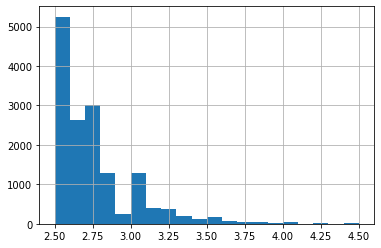

In [20]:
data['ceiling_height_est'].hist(bins=20, range=(2.5, 4.5))

#### Апартаменты (булев тип) - столбец `'is_apartment'`

В столбце `'is_apartment'` много пропущенных значений. А точнее - их 88%.

In [21]:
print("{0:.1%}".format(data['is_apartment'].isnull().sum()/len(data)))

88.3%


Попробуем снова сориентироваться по квартирам, где информация присутствует, в случае, если квартиры расположены в одном доме. В случае, если данные по столбцу `'is_apartment'` у квартир из того же дома будут расходиться, будем ориентироваться на мнение большинства при расхождении информации в группе квартир из одного дома. 

In [22]:
data_is_ap = data[~data['is_apartment'].isnull()].copy()
def same_house_ap (row):
    if np.isnan(row['is_apartment']):
        is_apartment_bool = data_is_ap[(data_is_ap['airports_nearest'] == row['airports_nearest'])&
                (data_is_ap['cityCenters_nearest'] == row['cityCenters_nearest'])&
                (data_is_ap['parks_nearest'] == row['parks_nearest'])&
                (data_is_ap['ponds_nearest'] == row['ponds_nearest'])].reset_index(drop=True)['is_apartment']    
        if is_apartment_bool.mean() >= 0.5:
            return True
        elif (is_apartment_bool.sum() < 0.5)&(len(is_apartment_bool) !=0):
            return False
        else:
            return row['is_apartment']
    else:
        return row['is_apartment']

data['is_apartment'] = data.apply(same_house_ap, axis=1)
print("{0:.1%}".format(data['is_apartment'].isnull().sum()/len(data)))

85.3%


Снова удалось восстановить информацию по 3% строк. Учитывая, что информации для обогащения было не так много - неплохой результат!

Что касается пропусков, заполним их исходя из логики, что информацию о том, является ли продаваемый объект апартаментами или нет, заполнили бы прежде всего владельцы апартаментов,владельцы же квартир не посчитали нужным уточнять и пропустили этот пункт.

In [23]:
data['is_apartment'].fillna(False, inplace=True)

####  Балконы - столбец `'balcony'`

В случае отсутствующего значения в столбце `'balcony'` можно предполагать, что балконов нет. Заменим пропуски на 0:

In [24]:
data['balcony'].fillna(0, inplace=True)

Заменим тип данных `'float64'` на `'int'` в тех столбцах, где это уместно и необходимо.

In [25]:
def type_change(col):
    data[col] = data[col].astype('int')

type_change('last_price')

Переведем значения столбца `'first_day_exposition'` из строк в даты:

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_est
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.70
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,NaN
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,NaN
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3.00
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3.03


#### Населенный пункт - столбец `'locality_name'`

Ранее обнаружили, что в столбце `'locality_name'` есть пропуски. Уточним, сколько строк не содержит информации о населенном пункте:

In [27]:
data['locality_name'].fillna('', inplace=True)
len(data[data['locality_name'] == ''])

49

Попробуем восстановить информацию о населенном пункте методом, которым мы уже воспользовались ранее: примем расстояние до центра города, аэропорта, парков и прудов за координаты и по ним найдем дома, где информация о населенном пункте внесена. Восполним недостающую информацию, там же, где не удалось уточнить информацию, в соответствующем столбце укажем, что населенный пункт неизвестен.

In [28]:
data_with_loc = data[data['locality_name'] != ''].copy()
def same_loc(row):
    if (row['locality_name'] == ''):
        same_loc_house = data_with_loc[(data_with_loc['airports_nearest'] == row['airports_nearest'])&
                (data_with_loc['cityCenters_nearest'] == row['cityCenters_nearest'])&
                (data_with_loc['parks_nearest'] == row['parks_nearest'])&
                (data_with_loc['ponds_nearest'] == row['ponds_nearest'])]['locality_name'].reset_index()
        if (len(same_loc_house) != 0):
            return  same_loc_house.loc[0,'locality_name'] 
        else:
            return 'Неизвестно'    
    else:
        return row['locality_name']

data['locality_name'] = data.apply(same_loc, axis=1)
len(data[data['locality_name'] == 'Неизвестно'])

46

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, продолжай в том же духе

</div>

### Шаг 3. Посчитайте и добавьте в таблицу

- Посчитаем и добавим в таблицу цену квадратного метра

In [29]:
data['per_sqr_mtr'] = data['last_price']/data['total_area']

- Добавим в таблицу день недели, месяц и год публикации объявления

In [30]:
data['first_exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['first_exposition_month'] = data['first_day_exposition'].dt.month
data['first_exposition_year'] = data['first_day_exposition'].dt.year

- Добавим в таблицу информацию об этаже, на котором расположена квартира (первый, последний, другой)

In [31]:
def floor_category(row):
    if np.isnan(row['floor']):
        return np.nan
    elif np.isnan(row['floors_total']):
        return np.nan
    elif row['floor'] == 1:
        return 'первый'
    elif (row['floor'] == int(row['floors_total'])):
        return 'последний'
    else: 
        return 'другой'

data['floor_category']= data.apply(floor_category, axis=1)  

In [32]:
data['1st_floor'] = (data['floor_category'] == 'первый')
data['last_floor'] = (data['floor_category'] == 'последний')

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Тоже всё хорошо и правильно

</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Обозначим типичные параметры продаваемых квартир. Рассмотрим площадь - ранее мы обнаружили, что в данных есть информация об очень маленьких и очень больших квартирах. Нет смысла рассматривать "хвост" и "выборсы", там нет типичных значений. Отфильтруем выборку, оставив квартиры с метражом от 20 до 200 метров.

In [33]:
#data_real = data_copy.copy()

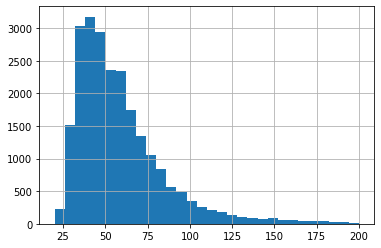

In [34]:
data_copy = data.copy()
data_real = data.query('20 < total_area < 200').reset_index(drop=True).copy()
data_real['total_area'].hist(bins=30, range=(20,200))

In [35]:
data_real['total_area'].describe()

count    23433.000000
mean        58.216528
std         26.442090
min         20.100000
25%         40.000000
50%         52.000000
75%         69.000000
max        199.200000
Name: total_area, dtype: float64

Медианная площадь продаваемых квартир составляет около 50 кв.метров. Половина всех квартир на рынке - метражом от 40 до 70 кв.метров. Посмотрим на типичное число комнат в продаваемых квартирах:

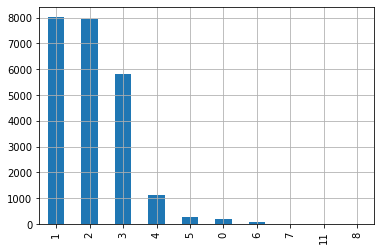

In [36]:
rooms_stat = data_real['rooms'].value_counts()
rooms_stat.plot(kind='bar', grid = True)

In [37]:
data_real['rooms'].value_counts()

1     8022
2     7939
3     5799
4     1137
5      264
0      186
6       62
7       20
11       2
8        2
Name: rooms, dtype: int64

In [38]:
data_real['rooms'].describe()

count    23433.000000
mean         2.036231
std          0.994699
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Лидеры по числу объявлений о продаже - одно- и двухкомнатные квартиры, немного меньше - трехкомнатных.
Они составляют основную массу всех объявлений о продаже.

В выборке есть квартиры с числом комнат 0. Посмотрим на них подробнее и проверим, в чем может быть причина:

In [39]:
zero_rooms = data_real.query('rooms == 0').copy().reset_index(drop=True)
zero_rooms.loc[:, 'total_images':'locality_name'].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name
0,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино
1,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,False,True,NaN,0.0,деревня Кудрово
2,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург
3,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,False,True,NaN,1.0,посёлок Парголово
4,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,0.0,посёлок Шушары


Можно предположить, что нулевое число комнат указано в том случае, если квартира является студией, или если это квартира "свободной планировки". Проверим, что хотя бы одно из этих условия выполнено:

In [40]:
zero_rooms['test'] = zero_rooms['studio']+zero_rooms['open_plan']
zero_rooms['test'].value_counts()

/opt/conda/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


True    186
Name: test, dtype: int64

Значит, нулевое число комнат - это не ошибочный ввод, такое значение логично, так как квартиры-студии не являются однокомнатными квартирами (ими считаются квартиры с отделенной кухней и прихожей),также как про квартиры со свободной планировкой нельзя отнести к другой категории по числу комнат. 

In [41]:
data_real.query('studio == True')['rooms'].value_counts()

0    130
1     11
Name: rooms, dtype: int64

При этом обнаружились квартиры-студии с 1 комнатой, и вероятно тут подразумевается все же квартира-студия, а не однокомнатная квартира. Логично поменять значение 1 на 0, в соответствии с логикой, которую мы приняли:


In [42]:
data_real['rooms'].where(~((data_real['rooms'] == 1)&(data_real['studio'] == True)), 0, inplace = True)
data_real.query('studio == True')['rooms'].value_counts()

0    141
Name: rooms, dtype: int64

Далее рассмотрим, как распределилась цена за квадратный метр.

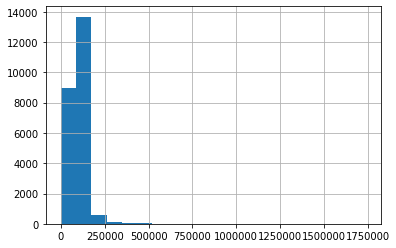

In [43]:
data_real['per_sqr_mtr'].hist(bins=20)

В выборке есть квартиры с очень высокой и очень низкой ценой за квадратный метр, рассмотрим их подробнее позже (для этого создадим копию data_real).

In [44]:
data_real_copy = data_real.copy()

Рассмотрим подробнее распределение цены квадратного метра, если она лежит в диапазоне от 10.000 до 400.000 руб:

In [45]:
data_real = data_real.query('10000 < per_sqr_mtr < 400000').reset_index(drop=True)

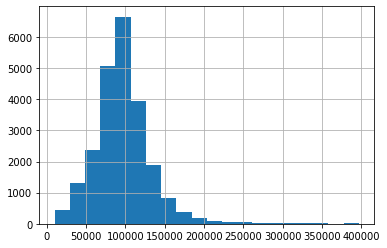

In [46]:
data_real['per_sqr_mtr'].hist(bins=20)

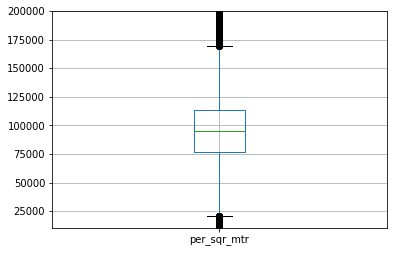

In [47]:
plt.ylim(10000,200000)
data_real.loc[:,['per_sqr_mtr','floor_category']].boxplot()

In [48]:
data_real['per_sqr_mtr'].describe()

count     23379.000000
mean      97357.707117
std       37890.718560
min       10185.185185
25%       76443.528926
50%       94786.729858
75%      113683.151541
max      396825.396825
Name: per_sqr_mtr, dtype: float64

В среднем цена за кв.метр приближается к 100 000 руб, межквартильный размах равен 37 000 руб.. 

Рассмотрим подробнее исключенные из анализа типичных показателей квартиры с очень низкой и очень высокой ценой за метр.

In [49]:
low_price = data_real_copy.query('per_sqr_mtr < 10000').copy()

In [50]:
low_price['bins'] = pd.cut(low_price['per_sqr_mtr'], 3)
low_price_pivot = low_price.pivot_table('per_sqr_mtr', index=['bins', 'locality_name'], aggfunc = ['count', 'median']).applymap("{0:,.0f}".format)
low_price_pivot.columns = ['число объектов', 'цена кв.метра (медиана)']

In [51]:
low_price_pivot

число объектов  \
bins                 locality_name                          
(102.331, 3279.685]  Санкт-Петербург                    1   
(6447.535, 9615.385] Сланцы                             1   
                     посёлок станции Свирь              1   

                                           цена кв.метра (медиана)  
bins                 locality_name                                  
(102.331, 3279.685]  Санкт-Петербург                           112  
(6447.535, 9615.385] Сланцы                                  9,615  
                     посёлок станции Свирь                   7,963

В "выбросы" попало три квартиры - одна из них с очевидно ошибочной ценой за квадратный метр, остальные - далекие от СПб населенные пункты, для которых такая цена совершенно реальна. 

In [52]:
hight_price = data_real_copy.query('per_sqr_mtr > 400000').copy()

In [53]:
hight_price['bins'] = pd.cut(hight_price['per_sqr_mtr'], 3)
hight_price_pivot = hight_price.pivot_table('per_sqr_mtr', index=['bins', 'locality_name'], aggfunc = ['count', 'median']).applymap("{0:,.0f}".format)
hight_price_pivot.columns = ['число объектов', 'цена кв.метра (медиана)']

In [54]:
hight_price_pivot

число объектов  \
bins                      locality_name                    
(400546.76, 846868.515]   Всеволожск                   1   
                          Санкт-Петербург             45   
(846868.515, 1291855.31]  Санкт-Петербург              3   
(1291855.31, 1736842.105] Санкт-Петербург              2   

                                          цена кв.метра (медиана)  
bins                      locality_name                            
(400546.76, 846868.515]   Всеволожск                      640,422  
                          Санкт-Петербург                 467,914  
(846868.515, 1291855.31]  Санкт-Петербург                 848,485  
(1291855.31, 1736842.105] Санкт-Петербург               1,639,723

В число лотов с очень высокой ценой за квадратный метр попали в основном квартиры в Петербурге, что также логично и может иметь место, но типичной картины по рынку не отражает, поэтому правильней дальше рассматривать выборку этих лотов.

Взглянем на такой параметр, как высота потолков. 
Также присутствуют "выбросы", аномалии - значения 1 или 32 метра. 

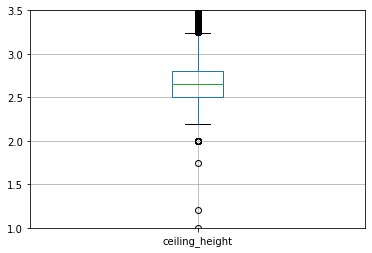

In [55]:
plt.ylim(1,3.5)
data_real.loc[:,['ceiling_height','floor_category']].boxplot()

Рассмотрим распределение этого значения, ограничив их разумными рамками - от 2.5 до 4.5 метров.

In [56]:
#data_real = data_real_copy.copy()

In [57]:
real_ceiling_height = data_real.query('2.5 <= ceiling_height < 4.5').copy()

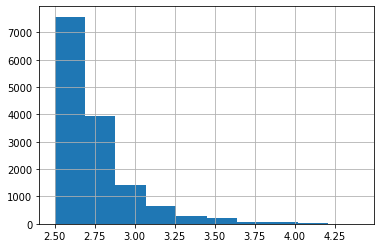

In [58]:
real_ceiling_height['ceiling_height'].hist()

In [59]:
real_ceiling_height['ceiling_height'].describe()

count    14188.000000
mean         2.717880
std          0.253846
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.400000
Name: ceiling_height, dtype: float64

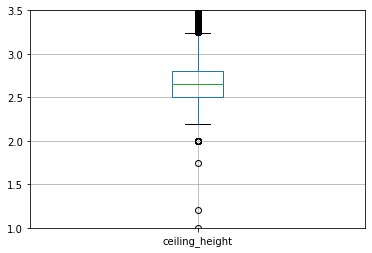

In [60]:
plt.ylim(1,3.5)
data_real.loc[:,['ceiling_height','floor_category']].boxplot()

Средняя (медианная) высота потолков в продаваемых квартирах - 2.65 м. 

Рассмотрим, сколько обычно длится процесс продажи:

In [61]:
data_real['days_exposition'].describe()

count    20265.000000
mean       179.683691
std        218.288451
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

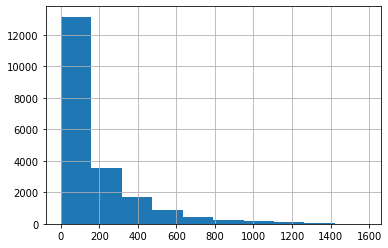

In [62]:
data_real['days_exposition'].hist()

В среднем продажа занимает 3 месяца, при этом некоторые лоты могут продаваться годами, четверть квартир продается за 1.5 и меньше месяца - это можно считать быстрым результатом. Долгим результатом можно считать срок примерно от года.

По части лотов информации о времени экспозиции объявления нет, что говорит о том, что лот не был снят  после продажи. Рассмотрим такие лоты подробнее:

In [63]:
days_exp_nan = data_real[data_real['days_exposition'].isnull()]

In [64]:
days_exp_nan.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ceiling_height_est,per_sqr_mtr,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_category,1st_floor,last_floor
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,755.0,NaN,2.70,120370.370370,3,3,2019,другой,False,False
1,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,NaN,NaN,110544.692737,3,4,2019,другой,False,False
2,13,5350000,40.00,2018-11-18,1,NaN,22.0,NaN,3,False,...,1152.0,NaN,2.76,133750.000000,6,11,2018,другой,False,False
3,17,5200000,50.60,2018-12-02,2,2.65,9.0,30.3,7,False,...,NaN,NaN,2.65,102766.798419,6,12,2018,другой,False,False
4,17,6600000,52.10,2019-01-31,2,2.60,24.0,29.7,9,False,...,NaN,NaN,2.60,126679.462572,3,1,2019,другой,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,20,21400000,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,...,NaN,NaN,3.00,147586.206897,4,11,2018,другой,False,False
3110,15,2490000,31.00,2019-01-24,1,2.50,5.0,17.3,5,False,...,NaN,NaN,2.50,80322.580645,3,1,2019,последний,False,True
3111,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,381.0,NaN,3.70,72490.845228,1,3,2017,другой,False,False
3112,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,44091.710758,6,2,2018,первый,True,False


In [65]:
days_exp_nan.pivot_table(index = 'first_exposition_year', values = 'total_area', aggfunc = 'count').sort_values(by = 'total_area')

,total_area
first_exposition_year,
2014,18
2015,65
2016,65
2017,259
2018,934
2019,1773


Вероятно, большая часть квартир, по которым нет информации о времени экспозиции объявления, все еще не продались. 

Рассмотрим, какие факторы больше всего влияют на цену квартиры. 
Рассмотрим зависимость цены от квадратного метра

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


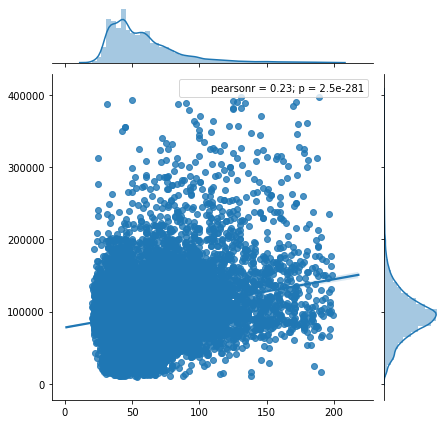

In [66]:
#data_real.plot(x='total_area', y='per_sqr_mtr', kind='scatter', alpha=0.03)
#sns.regplot(x='total_area', y='per_sqr_mtr', data=data_real)

j = sns.jointplot(x=data_real['total_area'].values, y=data_real['per_sqr_mtr'].values, kind="reg")
j.annotate(stats.pearsonr)
plt.show()

Цена квадратного метра коррелирует с площадью положительно, однако это скорее связано с корелляцией размера квартиры с отсутствующим в наших данных классом квартиры - то есть, предполагается, что среди больших квартир больше квартир бизнес-класса, где цена за метр выше.

In [67]:
price_corr = data_real[['per_sqr_mtr','total_area','rooms','cityCenters_nearest','1st_floor', 'last_floor','first_exposition_weekday','first_exposition_month','first_exposition_year']].copy()

In [68]:
price_corr.corr().applymap("{0:,.3f}".format)

,per_sqr_mtr,total_area,rooms,cityCenters_nearest,1st_floor,last_floor,first_exposition_weekday,first_exposition_month,first_exposition_year
per_sqr_mtr,1.000,0.231,-0.022,-0.384,-0.160,-0.088,-0.015,-0.005,0.028
total_area,0.231,1.000,0.789,-0.239,-0.040,0.023,-0.015,0.008,-0.083
rooms,-0.022,0.789,1.000,-0.167,0.039,0.049,-0.004,-0.004,-0.048
cityCenters_nearest,-0.384,-0.239,-0.167,1.000,0.058,0.018,0.010,-0.009,0.029
1st_floor,-0.160,-0.040,0.039,0.058,1.000,-0.151,-0.004,-0.013,-0.015
last_floor,-0.088,0.023,0.049,0.018,-0.151,1.000,0.007,-0.000,-0.004
first_exposition_weekday,-0.015,-0.015,-0.004,0.010,-0.004,0.007,1.000,0.012,-0.005
first_exposition_month,-0.005,0.008,-0.004,-0.009,-0.013,-0.000,0.012,1.000,-0.271
first_exposition_year,0.028,-0.083,-0.048,0.029,-0.015,-0.004,-0.005,-0.271,1.000


На цену квадратного метра значительней других факторов влияет удаленность от центра города. Также ощутимо влияние общей площади квартиры, про кооторую мы упомянули подробнее в предыдущем комментарии. Кроме того, наблюдается зависимость цены от этажа - в случае, если этаж первый, цена ниже. Для последнего этажа корреляция слабее, но также имеет место - последний этаж также идет с дисконтом. А вот дата экспозиции - будь то день недели, месяц или год -  практически не влияют на цену.

Найдем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [69]:
data_real.groupby(['locality_name'])['per_sqr_mtr'].agg(['count','mean']).sort_values(by ='count',ascending = False).head(10).applymap("{0:.0f}".format)


,count,mean
locality_name,,
Санкт-Петербург,15433,112009
посёлок Мурино,521,85749
посёлок Шушары,439,78656
Всеволожск,396,67239
Пушкин,363,103077
Колпино,337,75333
посёлок Парголово,326,90332
Гатчина,307,68746
деревня Кудрово,298,92482


Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [70]:
data_real.groupby(['locality_name'])['per_sqr_mtr'].agg(['count','mean']).sort_values(by ='count',ascending = False).head(10).sort_values(by ='mean',ascending = False).applymap("{0:.0f}".format)


,count,mean
locality_name,,
Санкт-Петербург,15433,112009
Пушкин,363,103077
деревня Кудрово,298,92482
посёлок Парголово,326,90332
посёлок Мурино,521,85749
посёлок Шушары,439,78656
Колпино,337,75333
Гатчина,307,68746
Всеволожск,396,67239


Из этих 10ти населенных пунктов самая высокая цена квадратного метра, ожидаемо, в Санкт-Петербурге, а самая низкая (из топ-10) - в Выборге.

Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра.

In [71]:
data_real['cityCenters_nearest_km'] = (data_real[~(data_real['cityCenters_nearest'].isnull())&(data_real['locality_name'] == 'Санкт-Петербург')]['cityCenters_nearest']/1000).astype('int')

In [72]:
data_center = data_real[~(data_real['cityCenters_nearest_km'].isnull())&(data_real['locality_name'] == 'Санкт-Петербург')].groupby(['cityCenters_nearest_km'])['per_sqr_mtr'].agg('mean').copy()

Построим график, показывающий, как цена зависит от удалённости от центра.

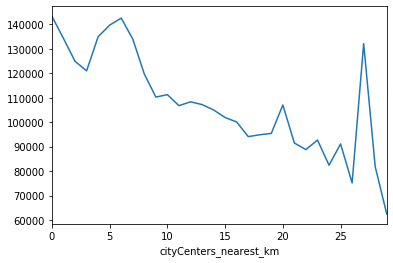

In [73]:
data_center.plot()

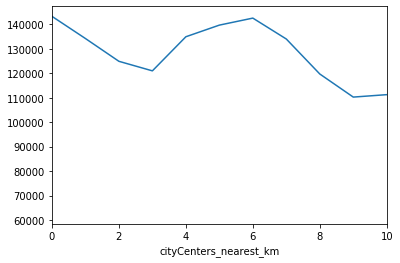

In [74]:
data_center.plot(xlim=(0,10))

Ограничим центр радиусом 3 км. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Центр выделен верно, супер!)
</div>

In [75]:
data_center_spb = data_real[(data_real['cityCenters_nearest_km'] <= 3)&(data_real['locality_name'] == 'Санкт-Петербург')]

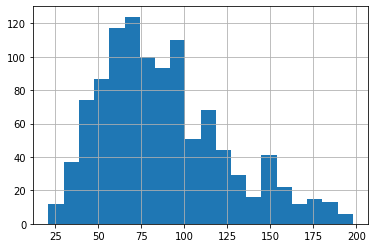

In [76]:
data_center_spb['total_area'].hist(bins=20)

In [77]:
data_center_spb['total_area'].describe()

count    1071.000000
mean       87.802465
std        36.358211
min        21.000000
25%        61.000000
50%        81.400000
75%       108.750000
max       198.000000
Name: total_area, dtype: float64

Медианная площадь продаваемых в центре Санкт-Петербурга квартир - примерно 80 кв. метров, что значительно  больше медианы в целом по рынку Санкт-Петербурга и Лен.области.
Из более чем 1000 продаваемых к центре Петербурга квартир более четверти приходится на квартиры метражом выше 100 кв.метров, то есть, в сравнении с общей статистикой, в центре Петербурга просторных квартир больше. 

Рассмотрим цену кв. метра на квартиры в центре Петербурга:

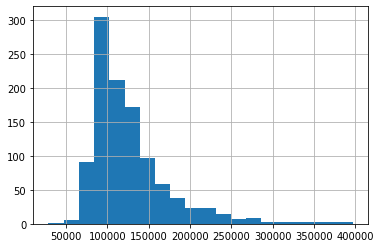

In [78]:
data_center_spb['per_sqr_mtr'].hist(bins=20)

In [79]:
data_center_spb['per_sqr_mtr'].describe()

count      1071.000000
mean     126148.175966
std       47072.408019
min       28919.631094
25%       94586.956522
50%      113333.333333
75%      141662.294509
max      396825.396825
Name: per_sqr_mtr, dtype: float64

Медианная цена за кв.метр в центре Петербурга составляет более 110.000 руб и на ~15.000 руб. выше, чем медианная цена по всей выборке. При этом она сильнее отличается от средней цены, и это в том числе значит, что дорогих квартир в центре больше, чем в среднем по выборке.  Минимальная цена квадратного метра, при этом, выше в три раза аналогичного значения для всего Питера и области, и составляет 30.000 руб.

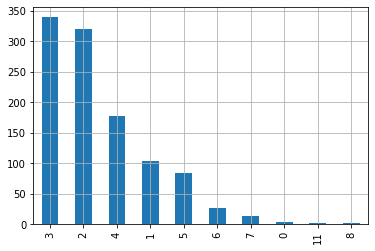

In [80]:
data_center_spb['rooms'].value_counts().plot(kind='bar', grid = True)

In [81]:
data_center_spb['rooms'].describe()

count    1071.000000
mean        2.960784
std         1.325647
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: rooms, dtype: float64

Интересно - для центра города характерно другое распределение по кличеству комнат - лидируют по числу объявлений о продаже трехкомнатные квартиры, от них немного отстают двухкомнатные, также заметное число четырехкомнатных, а вот однокомнатные - не самый популярный лот, в отличие от статистики по всей выборке, где однокомнатные квартиры лидируют наравне с двухкомнатными.

Посмотрим, что с высотой потолков в центре Питера. Сразу исключим "выбросы" из рассмотрения.

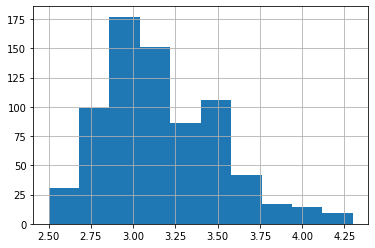

In [82]:
data_center_spb.query('2.5 <= ceiling_height < 4.5').copy()['ceiling_height'].hist()

In [83]:
data_center_spb.query('2.5 <= ceiling_height < 4.5').copy()['ceiling_height'].describe()

count    732.000000
mean       3.169221
std        0.337684
min        2.500000
25%        3.000000
50%        3.120000
75%        3.400000
max        4.300000
Name: ceiling_height, dtype: float64

В среднем высота потолков в центре Петербурга выше, что логично и объясняется, очевидно, тем, что больше предложений в старом фонде.

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).  Рассмотрим зависимость цены от квадратного метра.

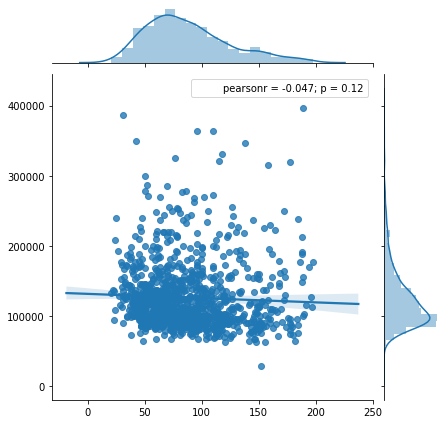

In [84]:
j = sns.jointplot(x=data_center_spb['total_area'].values, y=data_center_spb['per_sqr_mtr'].values, kind="reg")
j.annotate(stats.pearsonr)
plt.show()

Значительной зависимости не наблюдается, корреляцией в сотые доли можно пренебречь, очевидно. Эта картина отличается от той, что мы наблюдали по всей выборке, вероятно потому, что в центре города цена кв. метра более однородна, и фактор расстояния от центра больше влияет на цену кв. метра, нежели общий метраж квартиры. 


Рассмотрим матрицу корреляций для центра Петербурга, и для удобства продублируем ниже аналогичную матрицу для всей выборки.

In [85]:
price_corr_center_spb = data_center_spb[['per_sqr_mtr','total_area','rooms','cityCenters_nearest','1st_floor', 'last_floor','first_exposition_weekday','first_exposition_month','first_exposition_year']].copy()
price_corr_center_spb.corr().applymap("{0:,.3f}".format)

,per_sqr_mtr,total_area,rooms,cityCenters_nearest,1st_floor,last_floor,first_exposition_weekday,first_exposition_month,first_exposition_year
per_sqr_mtr,1.000,-0.047,-0.181,-0.151,-0.059,-0.044,-0.031,0.002,0.058
total_area,-0.047,1.000,0.788,-0.084,-0.178,0.015,-0.027,-0.042,-0.087
rooms,-0.181,0.788,1.000,-0.061,-0.126,0.035,-0.005,-0.057,-0.052
cityCenters_nearest,-0.151,-0.084,-0.061,1.000,-0.016,-0.017,-0.028,0.009,0.079
1st_floor,-0.059,-0.178,-0.126,-0.016,1.000,-0.231,-0.027,-0.002,0.024
last_floor,-0.044,0.015,0.035,-0.017,-0.231,1.000,0.079,-0.014,0.015
first_exposition_weekday,-0.031,-0.027,-0.005,-0.028,-0.027,0.079,1.000,-0.001,-0.032
first_exposition_month,0.002,-0.042,-0.057,0.009,-0.002,-0.014,-0.001,1.000,-0.233
first_exposition_year,0.058,-0.087,-0.052,0.079,0.024,0.015,-0.032,-0.233,1.000


In [86]:
price_corr.corr().applymap("{0:,.3f}".format)

,per_sqr_mtr,total_area,rooms,cityCenters_nearest,1st_floor,last_floor,first_exposition_weekday,first_exposition_month,first_exposition_year
per_sqr_mtr,1.000,0.231,-0.022,-0.384,-0.160,-0.088,-0.015,-0.005,0.028
total_area,0.231,1.000,0.789,-0.239,-0.040,0.023,-0.015,0.008,-0.083
rooms,-0.022,0.789,1.000,-0.167,0.039,0.049,-0.004,-0.004,-0.048
cityCenters_nearest,-0.384,-0.239,-0.167,1.000,0.058,0.018,0.010,-0.009,0.029
1st_floor,-0.160,-0.040,0.039,0.058,1.000,-0.151,-0.004,-0.013,-0.015
last_floor,-0.088,0.023,0.049,0.018,-0.151,1.000,0.007,-0.000,-0.004
first_exposition_weekday,-0.015,-0.015,-0.004,0.010,-0.004,0.007,1.000,0.012,-0.005
first_exposition_month,-0.005,0.008,-0.004,-0.009,-0.013,-0.000,0.012,1.000,-0.271
first_exposition_year,0.028,-0.083,-0.048,0.029,-0.015,-0.004,-0.005,-0.271,1.000


Что можно наблюдать - влияние числа комнат на цену кв. метра выросло, корреляция обратная - в квартирах с большим числом комнат цена кв. метра будет ниже. Это логичная корреляция, которую мы ожидали увидеть и в общей выборке, но не увидели, возможно, ввиду влияния параметра класса квартиры, который в выборке не указан. В центре Петербурга влияние этого фактора отсутствует, так как квартиры в центре можно рассматривать как однородный класс дорогого жилья. Также незначительно влияет и этаж, на котором находится продаваемая квартира - очевидно, потому, что спрос достаточно высок на любое жилье в этом радиусе.
Удаленность от центра, при этом, все еще самый влияющий фактор, но коэффициент корреляции для центра Петербурга ниже, чем для всей выборки, в следствие, очевидно, той же однородности - находящиеся в центре квартиры менее зависят по цене от расстояния от центра, учитывая, что оно для всех этих квартир невелико. Дата размещения объявления по прежнему практически не влияющий фактор.

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Просто класс! ОЧень здорово и детально, работа проделана колоссальная, продолжай в том же духе

</div>

### Шаг 5. Общий вывод

Рынок недвижимости Санкт-Петербурга и окресных населенных пунктов формирует в основном Санкт-Петербург, где число предложений о продаже на порядок превышает число предложений по другим населенным пунктам. 
- На цену квадратного метра значительней других факторов влияет удаленность от центра города. 
- Для всей выборки наблюдается зависимость цены от этажа - для первых и последних этажей цена кв. метра будет ниже. При этом для центра Петербурга (который ограничили радиусом 3 км) такая зависимость не сохраняется.
- Влияние числа комнат на цену кв. метра присутствует в центре Петербурга, корреляция обратная - в квартирах с большим числом комнат цена кв. метра будет ниже. Для общей выборки такая корреляция незначительна, возможно ввиду влияния класса жилья - среди квартир большего метража больше квартир класса "Бизнес" и выше, что соответственно влияет на среднюю цену кв. метра. Взаимное влияние этих двух факторов нивелирует обратную корреляцию цены кв. метра и площади квартиры, которая по логике должна присутствовать и в общей выборке.
- Дата экспозиции - будь то день недели, месяц или год - практически не влияют на цену.
- В центре Петербурга в стреднем квартиры просторней, потолки выше, комнат больше, средняя цена кв.метра, конечно, тоже больше.
- В среднем продажа квартиры занимает 3 месяца, при этом некоторые лоты могут продаваться годами, четверть квартир продается за 1.5 и меньше месяца - это можно считать быстрым результатом. Долгим результатом можно считать срок примерно от года.

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Качественный и цельный вывод, здорово!)

</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции, названия переменных передают смысл операций. В качестве совета предлагаю глубже изучить и начать применять конструкцию try-except в решении задачи — это улучшит отказоустойчивость кода и обезопасит код от поломок в будущем.

#### Выводы

У тебя отлично получается анализировать сложные данные, выдвигать корректные гипотезы и проверять свои выводы на возможность соответствия реальности. Видно глубокое понимание сути проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, так держать!)
